In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df=pd.read_excel('C://Users//asus//Desktop//df.xlsx')
le = preprocessing.LabelEncoder()
cols = ['Gender','Phone Service','Senior Citizen','Dependents','Online Backup','Device Protection' ,'Online Security','Partner','Churn Label','Multiple Lines','Tech Support','Streaming Movies','Streaming TV','Paperless Billing']
def replace_fun(df,col):
    df[col]=df[col].replace('No internet service','No')
    return df[col]
columns=['Online Backup','Device Protection','Online Security','Tech Support','Streaming Movies','Streaming TV']
for column in columns:
    df[column]=replace_fun(df,column)
df['Multiple Lines']=df['Multiple Lines'].replace('No phone service','No')
df['Internet Service']=df['Internet Service'].replace('No','No Internet Service')
df[cols]= df[cols].apply(le.fit_transform)

C:\Users\asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dummies_payment=pd.get_dummies(df['Payment Method'])
dummies_contracts=pd.get_dummies(df['Contract'])
dummies_internet=pd.get_dummies(df['Internet Service'])

In [3]:
df=df.drop(['Country','State','City','Payment Method','Contract','Churn Reason','Churn Label','Internet Service','Churn Score','CLTV','Lat Long'], axis=1)

In [4]:
frames=[df,dummies_payment,dummies_contracts,dummies_internet]
data=pd.concat(frames,axis=1)
data['Total Charges'] = data['Total Charges'].apply(pd.to_numeric, errors='coerce')
x=data.drop(['CustomerID','Churn Value','Count','Zip Code','Latitude','Longitude'],axis=1)
y=data['Churn Value']

In [5]:
def min_max_scaling(df):
    df_norm = df.copy()
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
data_normalized = min_max_scaling(x)
data_normalized.fillna(data_normalized.mean(), inplace=True)

In [6]:
cols=['Tenure Months','Total Charges','Monthly Charges']
Moy = x[cols].mean()
ecart= x[cols].std()
data_stand=x
data_stand[cols]=(x[cols]-Moy)/ecart
data_stand.fillna(data_stand.mean(), inplace=True)

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(data_normalized, y, test_size=0.2, random_state=1)

In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(gnb, 
           k_features=13, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

In [9]:
sfs = sfs.fit(X_train, y_train)
#pd.DataFrame.from_dict(sfs.get_metric_dict()).T

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished

[2021-01-06 21:34:03] Features: 1/13 -- score: 0.730386936457224[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished

[2021-01-06 21:34:04] Features: 2/13 -- score: 0.7421015264465743[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2021-01-06 21:34:04] Features: 3/13 -- score: 0.784877529286475[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [10]:
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.73038694]),
  'avg_score': 0.730386936457224,
  'feature_names': ('Gender',)},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.74210153]),
  'avg_score': 0.7421015264465743,
  'feature_names': ('Gender', 'Tenure Months')},
 3: {'feature_idx': (0, 4, 24),
  'cv_scores': array([0.78487753]),
  'avg_score': 0.784877529286475,
  'feature_names': ('Gender', 'Tenure Months', 'Fiber optic')},
 4: {'feature_idx': (0, 4, 6, 24),
  'cv_scores': array([0.78629748]),
  'avg_score': 0.7862974795882144,
  'feature_names': ('Gender',
   'Tenure Months',
   'Multiple Lines',
   'Fiber optic')},
 5: {'feature_idx': (0, 4, 6, 11, 24),
  'cv_scores': array([0.7886049]),
  'avg_score': 0.788604898828541,
  'feature_names': ('Gender',
   'Tenure Months',
   'Multiple Lines',
   'Streaming TV',
   'Fiber optic')},
 6: {'feature_idx': (0, 4, 6, 9, 11, 24),
  'cv_scores': array([0.78789492]),
  'avg_score': 0.7878949236776713,
  'feature_names': ('Gender',

In [11]:
cols=['Tenure Months','Multiple Lines','Online Backup','Device Protection','Streaming TV','Streaming Movies','Paperless Billing','Total Charges','Fiber optic']
X_train, X_test, y_train, y_test = train_test_split(data_normalized[cols], y, test_size=0.2, random_state=1)
gnb.fit(X_train,y_train)

GaussianNB()

In [12]:
y_pred=gnb.predict(X_test)

In [13]:
print('Accuracy of gnb on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of gnb on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of gnb on training set: 0.79
Accuracy of gnb on test set: 0.78


In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[921 138]
 [172 178]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1059
           1       0.56      0.51      0.53       350

    accuracy                           0.78      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [16]:
x=data.drop(['CustomerID','Count','Zip Code','Latitude','Longitude'],axis=1)

In [17]:
X_no = x[x['Churn Value'] == 0]
X_yes = x[x['Churn Value'] == 1]

In [18]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


Text(0.5, 1.0, 'Class Distribution After Resampling')

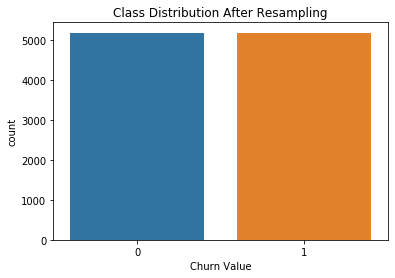

In [19]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn Value', data=X_upsampled).set_title('Class Distribution After Resampling')

In [20]:
X_upsampled.fillna(X_upsampled.mean(), inplace=True)
Y=X_upsampled['Churn Value']
X=X_upsampled.drop(['Churn Value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
sfs = sfs.fit(X_train, y_train)
sfs.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.3s finished

[2021-01-06 21:34:11] Features: 1/13 -- score: 0.727107997100749[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.2s finished

[2021-01-06 21:34:12] Features: 2/13 -- score: 0.7486107755496497[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.1s finished

[2021-01-06 21:34:13] Features: 3/13 -- score: 0.7540468712249335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

{1: {'feature_idx': (20,),
  'cv_scores': array([0.727108]),
  'avg_score': 0.727107997100749,
  'feature_names': ('Month-to-month',)},
 2: {'feature_idx': (3, 20),
  'cv_scores': array([0.74861078]),
  'avg_score': 0.7486107755496497,
  'feature_names': ('Dependents', 'Month-to-month')},
 3: {'feature_idx': (3, 20, 25),
  'cv_scores': array([0.75404687]),
  'avg_score': 0.7540468712249335,
  'feature_names': ('Dependents', 'Month-to-month', 'No Internet Service')},
 4: {'feature_idx': (3, 15, 20, 25),
  'cv_scores': array([0.75416767]),
  'avg_score': 0.754167673351051,
  'feature_names': ('Dependents',
   'Total Charges',
   'Month-to-month',
   'No Internet Service')},
 5: {'feature_idx': (3, 7, 15, 20, 25),
  'cv_scores': array([0.75525489]),
  'avg_score': 0.7552548924861078,
  'feature_names': ('Dependents',
   'Online Security',
   'Total Charges',
   'Month-to-month',
   'No Internet Service')},
 6: {'feature_idx': (3, 7, 10, 15, 20, 25),
  'cv_scores': array([0.75646291]),
  '

In [21]:
cols=['Gender','Dependents','Tenure Months','Phone Service','Multiple Lines','Online Security','Online Backup','Streaming TV','Streaming Movies','Total Charges','Month-to-month',
   'No Internet Service']
gnb.fit(X_train[cols],y_train)

GaussianNB()

In [22]:
y_pred=gnb.predict(X_test[cols])
print('Accuracy of gnb on training set: {:.2f}'
     .format(gnb.score(X_train[cols], y_train)))
print('Accuracy of gnb on test set: {:.2f}'
     .format(gnb.score(X_test[cols], y_test)))

Accuracy of gnb on training set: 0.75
Accuracy of gnb on test set: 0.76


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1049
           1       0.75      0.76      0.76      1021

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



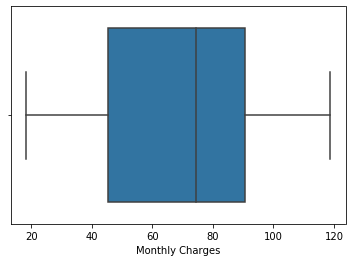

In [26]:
ax = sns.boxplot(x=X['Monthly Charges'])

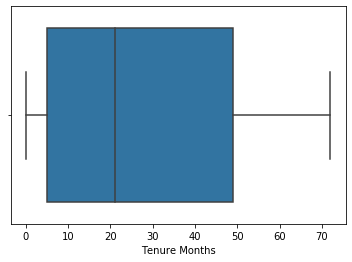

In [25]:
ax = sns.boxplot(x=X['Tenure Months'])

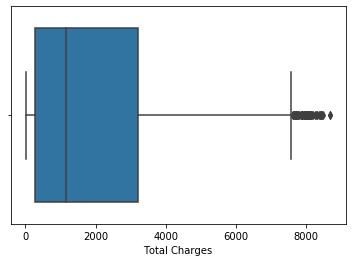

In [74]:
ax = sns.boxplot(x=X['Total Charges'])

In [29]:
from scipy import stats
stats.shapiro(X['Tenure Months'])

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8810396194458008, 0.0)

In [ ]:
from scipy import stats
stats.shapiro(X['Tenure Months'])

In [41]:
from imblearn.under_sampling import RandomUnderSampler
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=1)


In [42]:
X=data.drop(['CustomerID','Churn Value','Count','Zip Code','Latitude','Longitude'],axis=1)
y=data['Churn Value']
X, y = under.fit_resample(X, y)

In [43]:
from scipy import stats
stats.shapiro(X['Tenure Months'])

(0.884081244468689, 0.0)

In [44]:
X.shape

(3738, 26)

In [72]:
from random import sample
sampled=sample(list(X['Tenure Months']),500)

In [73]:
stats.shapiro(sampled)

(0.8819242715835571, 4.353124310536743e-19)